## TODOs

* remove up until age 7 from dataset
* correct mislabeled or filenames that don't have labels?
* show_top_losses -> some labels don't register

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import fastai
from fastai.vision import *

from torchvision import models
from visualization.modules import LayeredModule, get_nested_layers
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
path = Path("/home/jupyter/fai-berlin-faces/cropped/")
#path = Path("/Users/cfuentes/Documents/courses/fellowship-ai/data/fai-berlin-faces/cropped")
#! rm "/home/jupyter/fai-berlin-faces/cropped/61_1_20170109142408075.jpg.chip.jpg"
#! rm "/home/jupyter/fai-berlin-faces/cropped/61_3_20170109150557335.jpg.chip.jpg"
for name in ('61_1_20170109142408075.jpg.chip.jpg', '61_3_20170109150557335.jpg.chip.jpg'):
    file = path / name
    if file.exists():
        print(f'Deleting {file}')
        file.unlink()

In [4]:
verify_images(path, recurse=True)

In [5]:
def get_age(path): return int(path.name.split("_")[0])

In [6]:
def isFemale(path): return bool(int(path.name.split('_')[1]))

def get_gender(path):
   # print(path, "path here")
    return "female" if isFemale(path) else "male"

In [7]:
races = ["White", "Black", "Asian", "Indian", "Others"]

def get_race(path):
    return races[int(path.name.split("_")[2])]

In [9]:
tfms = get_transforms()

In [17]:
data = ( ImageList.from_folder(path) \
            .filter_by_func(lambda p: get_age(p) > 7) \
            #.use_partial_data(0.05) \
            .split_by_rand_pct(0.2) \
            .label_from_func(get_gender) \
            .transform(tfms) \
            .databunch() \
            .normalize(imagenet_stats) )

In [18]:
data.classes, data.c, len(data.train_ds) + len(data.valid_ds)

(['female', 'male'], 2, 7227)

In [19]:
learner = cnn_learner(data, models.vgg19, metrics=[accuracy], path="/home/jupyter/models")

In [20]:
learner.freeze()

In [21]:
learner.fit_one_cycle(2,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.728786,0.467913,0.820069,00:44
1,0.553299,0.408910,0.844983,00:42


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


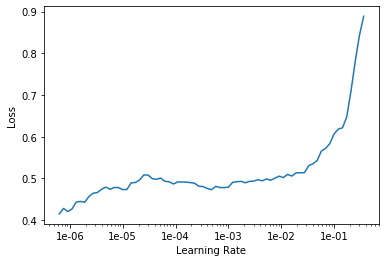

In [22]:
learner.lr_find()
learner.recorder.plot()

In [24]:
learner.fit_one_cycle(2,slice(5e-2/10, 1e-3/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.496365,0.372585,0.855363,00:41
1,0.471051,0.360543,0.856747,00:42


In [28]:
learner.path = Path("/home/jupyter/models")
learner.save("vgg19_age1")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


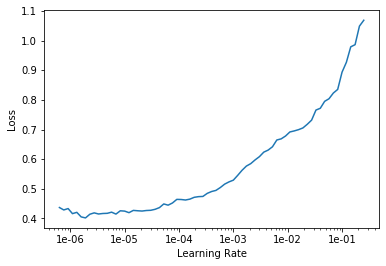

In [29]:
learner.unfreeze()
learner.lr_find()
learner.recorder.plot()

In [30]:
learner.fit_one_cycle(2,slice(5e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.410295,0.265730,0.898962,01:43
1,0.323407,0.223257,0.915571,01:44


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


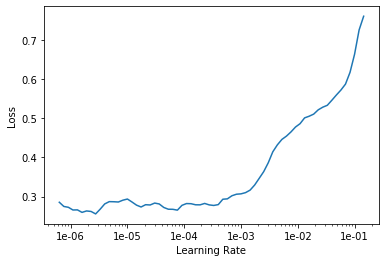

In [31]:
#learner.freeze(-2)
learner.lr_find()
learner.recorder.plot()
learner.fit_one_cycle(2,slice(5e-5, 3e-4))

In [33]:
learner.save("vgg19_age_2")

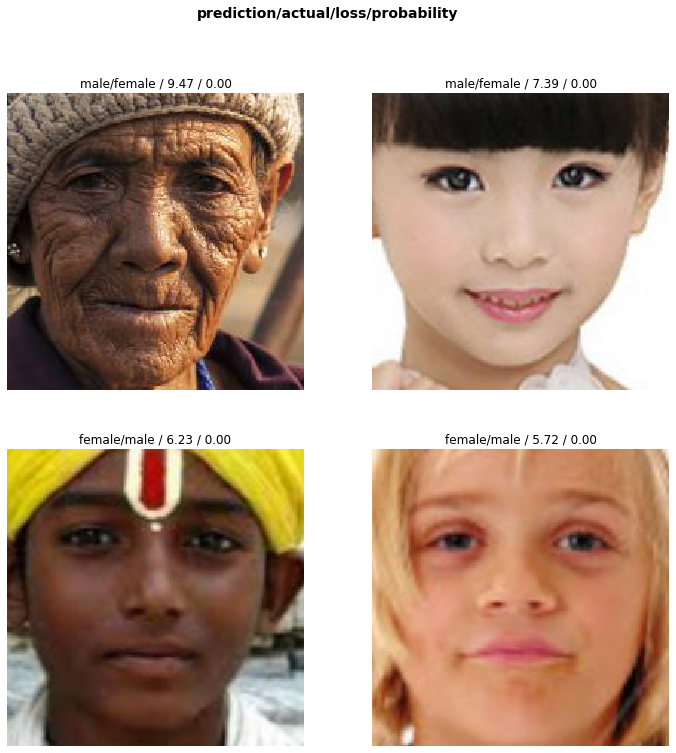

In [32]:
#did they change that API ? It was easier previously
'''
preds,y,losses = learner.get_preds(with_loss=True)
interp = ClassificationInterpretation(learner, preds, y, losses)
'''
interp = learner.interpret()
# interp.top_losses()
interp.plot_top_losses(4)

In [37]:
path = Path("/home/jupyter/fai-berlin-faces/imdb_crop/")


In [38]:
import scipy.io
mat = scipy.io.loadmat(path / 'imdb.mat')

In [44]:
mat['imdb'][0][0]

(array([[693726, 693726, 693726, 693726, ..., 726831, 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, 1968, ..., 2011, 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
        array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
        array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
        array(['01/nm0000001_rm946909184_1899-5-10_1968.jpg'], dtype='<U43'), ...,
        array(['08/nm3994408_rm784182528_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]], dtype=object), array([[1., 1., 1., 1., ..., 0., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'), array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12